# K-Nearest Neighbour

## Reference

In [2]:
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

## IMport Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif, SelectFromModel, SelectKBest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.decomposition import PCA

## Import Data

In [4]:
path1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/airline_satisfaction_test.csv'
path2 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/airline_satisfaction_train.csv'

passerage_test = pd.read_csv(path1)
passerage_train = pd.read_csv(path2)

In [5]:
# test informatin
passerage_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [6]:
passerage_test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [7]:
passerage_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
passerage_train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## Orgnaise the data 

In [9]:
# remove the id and unname columns
passerage_test =  passerage_test.drop(columns = ['Unnamed: 0', 'id'])
passerage_train = passerage_train.drop(columns = ['Unnamed: 0', 'id'])

In [10]:
# drop missing data for both data 
passerage_test = passerage_test.dropna()
passerage_train = passerage_train.dropna()

In [11]:
# find 'object' data and transform these data to numbers type for both test and training data
object_name1 = passerage_test.select_dtypes('object').columns
la = LabelEncoder()
passerage_test[object_name1] = passerage_test[object_name1].apply(la.fit_transform)

object_name2 = passerage_train.select_dtypes('object').columns

passerage_train[object_name2] = passerage_train[object_name2].apply(la.fit_transform)

## Normalize the data 

In [12]:
st = StandardScaler()

normalize_train = passerage_train.copy()

cond = normalize_train.columns == 'satisfaction'

# find all features name
features_name = normalize_train.columns[~cond]

# normalize the data
normalize_train[features_name] = st.fit_transform(normalize_train[features_name])



# do the same thing to test
normalize_test = passerage_test.copy()

cond1 = normalize_test.columns == 'satisfaction'

# find all features name
features_name = normalize_test.columns[~cond1]

# normalize the data
normalize_test[features_name] = st.fit_transform(normalize_test[features_name])

## Check whether the data is balance

In [13]:
normalize_train.satisfaction.value_counts()

0    58697
1    44897
Name: satisfaction, dtype: int64

## Visual

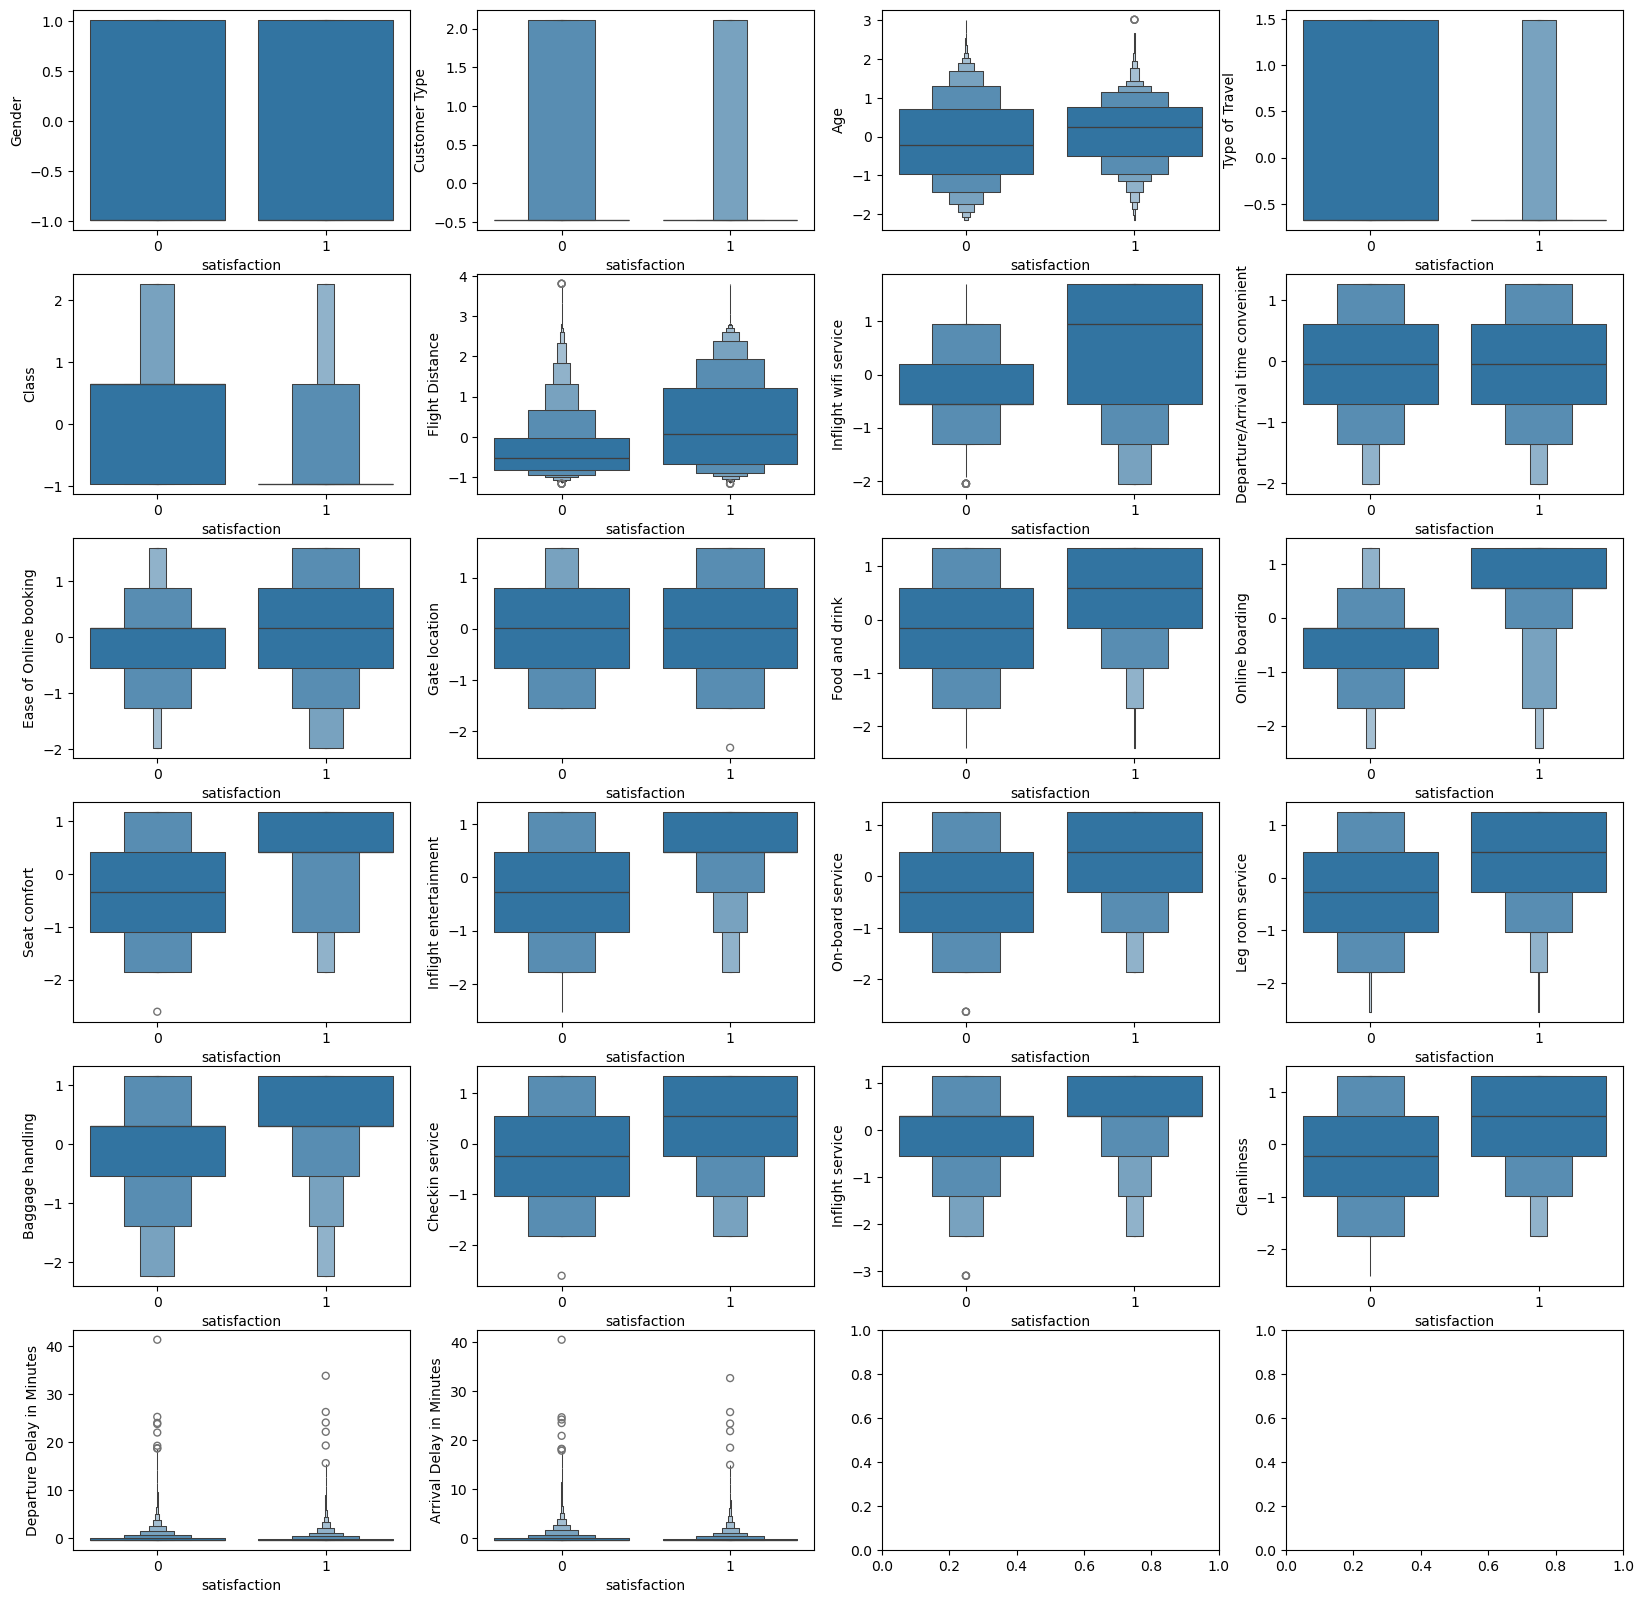

In [14]:
# use the training data to plot 
fig , ax = plt.subplots(nrows = 6, ncols = 4, figsize = (20, 20))
ax = np.ravel(ax)
j = 0
for i in features_name:
  sns.boxenplot(ax = ax[j], data = normalize_train, x = 'satisfaction', y = i)
  j = j+1
plt.show()


## PCA SElect Features

In [15]:
# utilise PCA to reduce feature dimension
pca = PCA(n_components = 10 ) 
reduced_X = pca.fit_transform(X = normalize_train[features_name])
pca.explained_variance_ratio_.sum()

0.8018326153937774

## Use K-Nearest Neighbour to train the data

In [16]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(X = reduced_X, y = normalize_train['satisfaction'])

KNeighborsClassifier()

## Evaluate The model

In [17]:
# errorate_rate = []
# for i in range(1,23):
#   knear = KNeighborsClassifier(n_neighbors = i)
#   knear.fit(X = reduced_X, y = normalize_train['satisfaction'])
#   y_pred_i = knear.predict(X = reduced_X)
#   errorate_rate.append(np.mean(y_pred_i != normalize_train['satisfaction']))


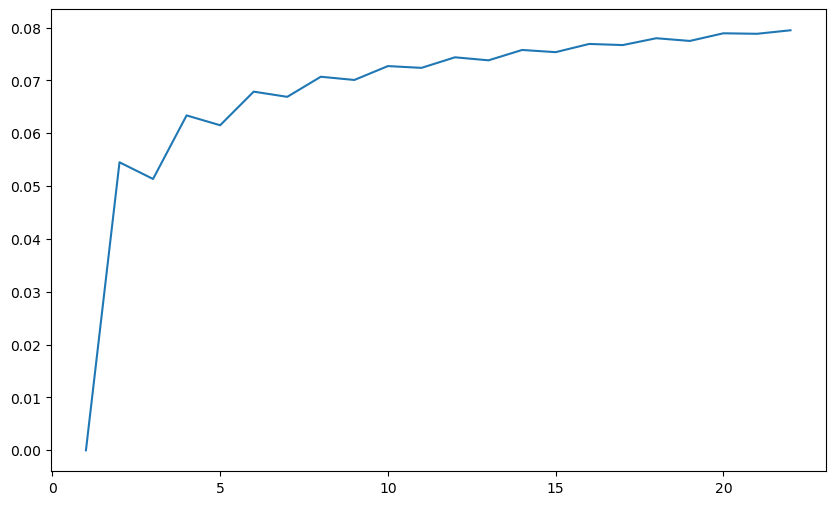

In [30]:
# figsize = (10, 6)
# plt.figure(figsize = figsize )
# plt.plot(range(1,23), errorate_rate)

## Pick K

In [37]:
accuracy = []
for i in range(1,20):
  knest = KNeighborsClassifier(n_neighbors = i)
  knest.fit(X = reduced_X, y = normalize_train['satisfaction'])
  accuracy.append(knest.score(X = reduced_X, y = normalize_train['satisfaction']))
accuracy
 

[1.0,
 0.9454987740602737,
 0.9486553275286214,
 0.9366276039152847,
 0.9384906461764195,
 0.9321292738961716,
 0.933113886904647,
 0.929310577832693,
 0.9299187211614572,
 0.9272930864721896,
 0.9276309438770585,
 0.9256327586539761,
 0.9262022897078981,
 0.9242427167596579,
 0.9246577987142113,
 0.9231036546518138,
 0.9233160221634458,
 0.922022510956233,
 0.9225341235978918]

## Use PCA and K-nearest on test data 

In [31]:
# use fitted pca model to reduce the dimension
reduced_Xtest = pca.transform(X = normalize_test[features_name])

# use the fitted model to predict the results for test
y_pred = kn.predict(X = reduced_Xtest)

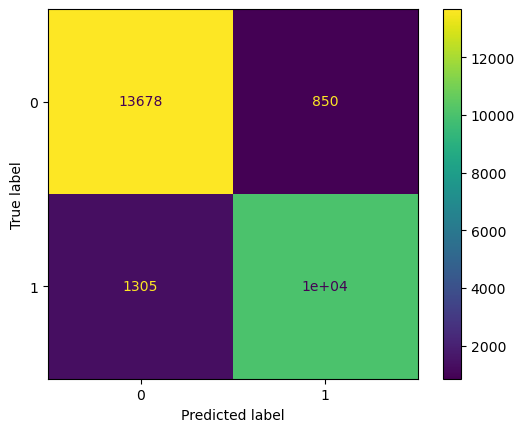

In [32]:
# calculate the confusion matrix
cm = confusion_matrix(y_true = normalize_test['satisfaction'], y_pred = y_pred)
dis = ConfusionMatrixDisplay( cm)
dis.plot()
plt.show()

## Accuracy

In [33]:
print(classification_report(y_true = normalize_test['satisfaction'], y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     14528
           1       0.92      0.89      0.90     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.91      0.92     25893
weighted avg       0.92      0.92      0.92     25893

